# Air New Zealand's weekly stock price prediction based on Google Trend Indexes

## Table of Contents
* [Content](#Table-of-Contents)
* [1. Introduction](#1.-Introduction)
* [2. Data Acquisition](#2.-Data-Acquisition)
    * [2.1 Google Top Trend](#2.1-Google-Top-Trend)
    * [2.2 Yahoo Finance](#2.2-Yahoo-Finance)
* [3. Data Analysis](#3.-Data-Analysis)
    * [3.1 Correlation Analysis](#3.1-Correlation-Analysis)
    * [3.2 Linear Analysis](#3.2-Linear-Analysis)
        * [Bivariate Analysis](#Bivariate-Analysis)
        * [Multivariate Analysis with current stock price](#Multivariate-Analysis-with-current-stock-price)
        * [Multivariate Analysis only using Google Trend Indexes](#Multivariate-Analysis-only-using-Google-Trend-Indexes)
        * [Multivariate Analysis using sklearn library](#Multivariate-Analysis-using-sklearn-library)
        * [Normalization using logarithm](#Normalization-using-logarithm)
        * [Linear Regression Models Comparison](#Linear-Regression-Models-Comparison)
        * [Normalization using minimum and maximum](#Normalization-using-minimum-and-maximum)
    * [3.3 Logistic Regression](#3.3-Logistic-Regression)
    * [3.4 KNN](#3.4-KNN)
* [4. Conclusion](#4.-Conclusion)

## 1. Introduction

This report finds the relationship between stock price of Air New Zealand and some keywords related to the company such as 'air new zealand', 'flight' and so on. Also, the report discovers prediction models.

In [1]:
import json
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import time
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import statsmodels.formula.api as smf
import math 
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
from scipy import stats
from pylab import rcParams
import mpld3

import tweepy
import csv
import os
import re

from pytrends.request import TrendReq
from yahoo_finance import Share
from datetime import date
import datetime as dt
import datetime
from dateutil.relativedelta import relativedelta


import warnings
warnings.filterwarnings('ignore')

## 2. Data Acquisition

### 2.1 Google Top Trend
This part loads the data using the API. Data is from five years ago to the present and weekly.(source: https://trends.google.co.nz/trends/)

**Key Words ** 

searched worldwide: air new zealand, auckland, wellington

searched in New Zealand: air new zealand, flight, travel, airpoints, grab a seat, check in, fiji, dunedin, christchurch, queenstown, nelson


In [2]:
from pytrends.request import TrendReq

In [3]:
# This is from https://github.com/GeneralMills/pytrends and is not an Google official API.
# The ID is a kind of dummy, not being used one.

pytrends = TrendReq('peterhwang105@gmail.com', 'Machine158.222', hl='en-US', tz=360, custom_useragent=None)

In [4]:
pytrends.build_payload(kw_list=['air new zealand'], cat=0, timeframe='today 5-y', geo='', gprop='')
name = pytrends.interest_over_time()
name = name.rename(columns={'air new zealand':'airNZ'})
pytrends.build_payload(kw_list=['air new zealand'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
namenz = pytrends.interest_over_time()
namenz = namenz.rename(columns={'air new zealand':'airNZ_NZ'})
pytrends.build_payload(kw_list=['flight'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
flight = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['travel'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
travel = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['airpoints'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
point = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['grab a seat'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
grab = pytrends.interest_over_time()
grab = grab.rename(columns={'grab a seat':'grab_a_seat'})
pytrends.build_payload(kw_list=['check in'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
check = pytrends.interest_over_time()
check = check.rename(columns={'check in':'check_in'})
pytrends.build_payload(kw_list=['fiji'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
fiji = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['auckland'], cat=0, timeframe='today 5-y', geo='', gprop='')
auckland = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['wellington'], cat=0, timeframe='today 5-y', geo='', gprop='')
wellington = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['dunedin'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
dunedin = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['christchurch'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
church = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['queenstown'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
queen = pytrends.interest_over_time()
pytrends.build_payload(kw_list=['nelson'], cat=0, timeframe='today 5-y', geo='NZ', gprop='')
nelson = pytrends.interest_over_time()
airGgl = pd.concat([name, namenz, flight, travel, point, grab, check, fiji, auckland, wellington, dunedin, church, queen, nelson], axis=1)

In [5]:
airGgl = airGgl.astype(float)
airGgl.head()

,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,
2012-08-05,77.0,74.0,42.0,90.0,44.0,77.0,46.0,47.0,73.0,56.0,54.0,52.0,39.0,40.0
2012-08-12,82.0,76.0,45.0,95.0,42.0,75.0,43.0,51.0,75.0,58.0,58.0,57.0,43.0,42.0
2012-08-19,77.0,72.0,47.0,89.0,40.0,73.0,53.0,48.0,76.0,59.0,56.0,54.0,44.0,40.0
2012-08-26,76.0,74.0,54.0,84.0,38.0,79.0,45.0,43.0,72.0,58.0,55.0,53.0,40.0,42.0
2012-09-02,77.0,76.0,52.0,90.0,49.0,73.0,46.0,45.0,74.0,59.0,58.0,54.0,41.0,43.0


### 2.2 Yahoo Finance

In [6]:
import datetime as dt

In [7]:
#gain today and 5 years ago date
today=dt.date.today()
fiveYearAgo = today.replace(year = today.year -5)
#coverting datetime into string
today = today.strftime('%Y-%m-%d')
fiveYearAgo = fiveYearAgo.strftime('%Y-%m-%d')

In [8]:
# function define
# This function is to get average adjusted value, next week average value, volume of a week and the date(First date of the week which is Sunday)
def avrVolValNvalNDate(df):
    pre = 4
    aVol = []
    date = []
    aAdj = []
    nAdj = []
    vsum = 0
    asum = 0
    vcount = 0
    acount = 0
    nAV = np.nan
    for index, adj, vol in zip(df.index, df['Adj_Close'],df['Volume']):
        if(pre<index.weekday()):
            if(vcount==0):
                aVol.append(0)
            else:
                aVol.append((vsum/vcount))
            aAdj.append((asum/acount))
            nAdj.append(nAV)
            nAV = asum/acount
            if(index.weekday()==4):
                date.append(index + datetime.timedelta(days=2))
            elif(index.weekday()==3):
                date.append(index + datetime.timedelta(days=3))
            elif(index.weekday()==2):
                date.append(index + datetime.timedelta(days=4))
            elif(index.weekday()==1):
                date.append(index + datetime.timedelta(days=5))
            elif(index.weekday()==0):
                date.append(index + datetime.timedelta(days=6))
            pre = index.weekday()
            vsum = vol
            asum = adj
            vcount = 1
            if(vol==0):
                vcount = 0
            acount = 1
        else:
            vsum = vsum + vol
            asum = asum + adj
            acount = acount +1
            vcount = vcount +1
            if(vol==0):
                vcount = vcount -1 #volume 0 means that the market did not open on that day
            pre = index.weekday()
    return aVol, aAdj, nAdj, date

In [9]:
# this function adds a column which indicates whether the stock price increased or decreased
# 0 : same or decreased
# 1 : increased
def checkINC(df):
    temp = []
    for nV, cV in zip(df['Nxt_Value'],df['Value']):
        if((nV-cV) > 0.0):
            temp.append(1)
        elif((nV-cV) <= 0.0):
            temp.append(0)
    return temp

In [10]:
# this function is for gaining the change rate of index
def rate(df):
    d = pd.DataFrame()
    for col in df.columns[:]:
        pre = -1.0
        temp = []
        for row in df[col]:
            if(pre == -1.0):
                temp.append(np.nan)
                pre = float(row)
            else :
                row = float(row)
                r = ((row - pre)/pre)
                temp.append(r)
                pre = row
        d['r'+col] = temp
    d.index = df.index
    d = d.dropna(axis=0)
    return d

In [11]:
from yahoo_finance import Share

In [12]:
# Yahoo Finance API might be bronken. historical function doesn't work
# Therefore, will load the data stored before
"""
air_s = Share('AIR.NZ')
air_s.get_historical(fiveYearAgo, today)
air_history = air_s.get_historical(fiveYearAgo, today)
air_history = pd.DataFrame(air_history)
air_history = air_history.set_index('Date')
air_history.index = pd.to_datetime(air_history.index)
air_history['Volume'] = pd.to_numeric(air_history['Volume'])
air_history['Adj_Close'] = pd.to_numeric(air_history['Adj_Close'])
"""

"\nair_s = Share('AIR.NZ')\nair_s.get_historical(fiveYearAgo, today)\nair_history = air_s.get_historical(fiveYearAgo, today)\nair_history = pd.DataFrame(air_history)\nair_history = air_history.set_index('Date')\nair_history.index = pd.to_datetime(air_history.index)\nair_history['Volume'] = pd.to_numeric(air_history['Volume'])\nair_history['Adj_Close'] = pd.to_numeric(air_history['Adj_Close'])\n"

In [13]:
"""
vol_temp = []
adj_temp = []
date_temp = []
nAdj_temp = []
vol_temp, adj_temp, nAdj_temp, date_temp = avrVolValNvalNDate(air_history)

temp = []
temp = pd.DataFrame({'Volume':vol_temp,'Value':adj_temp, 'Nxt_Value': nAdj_temp}, index=date_temp)
air = pd.concat([temp, airGgl], axis=1, join_axes=[airGgl.index])
air = air.dropna(axis = 0)

airNZ_rate = rate(airGgl)
airNZ_rate = pd.concat([temp, airNZ_rate], axis=1, join_axes=[airNZ_rate.index])
airNZ_rate = airNZ_rate.dropna(axis = 0)

air['Check_INC'] = checkINC(air)
cols = air.columns.tolist()
cols = cols[-1:] + cols[:-1]
air = air[cols]

# to predict using the change rate of Google Trend Indexes
airNZ_rate['Check_INC'] = checkINC(airNZ_rate)
cols = airNZ_rate.columns.tolist()
cols = cols[-1:] + cols[:-1]
airNZ_rate = airNZ_rate[cols]
"""

"\nvol_temp = []\nadj_temp = []\ndate_temp = []\nnAdj_temp = []\nvol_temp, adj_temp, nAdj_temp, date_temp = avrVolValNvalNDate(air_history)\n\ntemp = []\ntemp = pd.DataFrame({'Volume':vol_temp,'Value':adj_temp, 'Nxt_Value': nAdj_temp}, index=date_temp)\nair = pd.concat([temp, airGgl], axis=1, join_axes=[airGgl.index])\nair = air.dropna(axis = 0)\n\nairNZ_rate = rate(airGgl)\nairNZ_rate = pd.concat([temp, airNZ_rate], axis=1, join_axes=[airNZ_rate.index])\nairNZ_rate = airNZ_rate.dropna(axis = 0)\n\nair['Check_INC'] = checkINC(air)\ncols = air.columns.tolist()\ncols = cols[-1:] + cols[:-1]\nair = air[cols]\n\n# to predict using the change rate of Google Trend Indexes\nairNZ_rate['Check_INC'] = checkINC(airNZ_rate)\ncols = airNZ_rate.columns.tolist()\ncols = cols[-1:] + cols[:-1]\nairNZ_rate = airNZ_rate[cols]\n"

The Google Trend data and Stock data are kept changing, so the research uses the data on 21/4/2017 store into csv files. The main purpose is to remove outliers. Fron now on, the report finds several models based on the files.

In [14]:
air = pd.read_csv('../air.csv', index_col=0)

In [15]:
air.head()

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2012-04-29,1,0.6210,0.6028,172420.0,70.0,73.0,48.0,93.0,40.0,80.0,35.0,40.0,75.0,58.0,70.0,66.0,44.0,41.0
2012-05-06,1,0.6218,0.6210,289300.0,67.0,71.0,45.0,90.0,37.0,71.0,36.0,44.0,75.0,57.0,70.0,65.0,44.0,43.0
2012-05-13,0,0.6128,0.6218,151080.0,77.0,69.0,49.0,94.0,43.0,75.0,32.0,45.0,74.0,57.0,70.0,65.0,44.0,42.0
2012-05-20,0,0.5934,0.6128,227920.0,74.0,73.0,49.0,89.0,35.0,74.0,40.0,41.0,72.0,55.0,67.0,69.0,41.0,42.0
2012-05-27,0,0.5774,0.5934,344400.0,70.0,70.0,48.0,93.0,35.0,70.0,46.0,46.0,71.0,55.0,67.0,64.0,46.0,39.0


## 3. Data Analysis

### 3.1 Correlation Analysis

In [16]:
# This table is based on Google Trend Indexes
air.corr().head()

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
Check_INC,1.000000,0.011884,-0.052663,0.066116,0.072114,0.028321,0.056593,0.005325,-0.063521,0.022101,0.005294,-0.032715,0.064826,0.030263,-0.056745,0.074266,0.006353,0.064626
Nxt_Value,0.011884,1.000000,0.995716,-0.004801,-0.566671,-0.450225,0.233803,-0.323709,0.560390,-0.778920,0.807249,0.210847,0.380147,0.641925,0.620676,0.292938,0.619788,0.517055
Value,-0.052663,0.995716,1.000000,-0.007138,-0.564557,-0.444469,0.235364,-0.321680,0.561332,-0.773768,0.800238,0.215369,0.370944,0.638316,0.624756,0.284138,0.618372,0.511715
Volume,0.066116,-0.004801,-0.007138,1.000000,0.019490,0.038017,-0.073812,-0.106225,0.007986,0.022668,0.011966,-0.019819,-0.017273,-0.049128,-0.024654,0.041611,-0.068332,0.026239
airNZ,0.072114,-0.566671,-0.564557,0.019490,1.000000,0.843098,0.037711,0.604533,-0.351018,0.679183,-0.547922,-0.102945,0.048636,-0.484114,-0.327579,0.014412,-0.279600,-0.255558


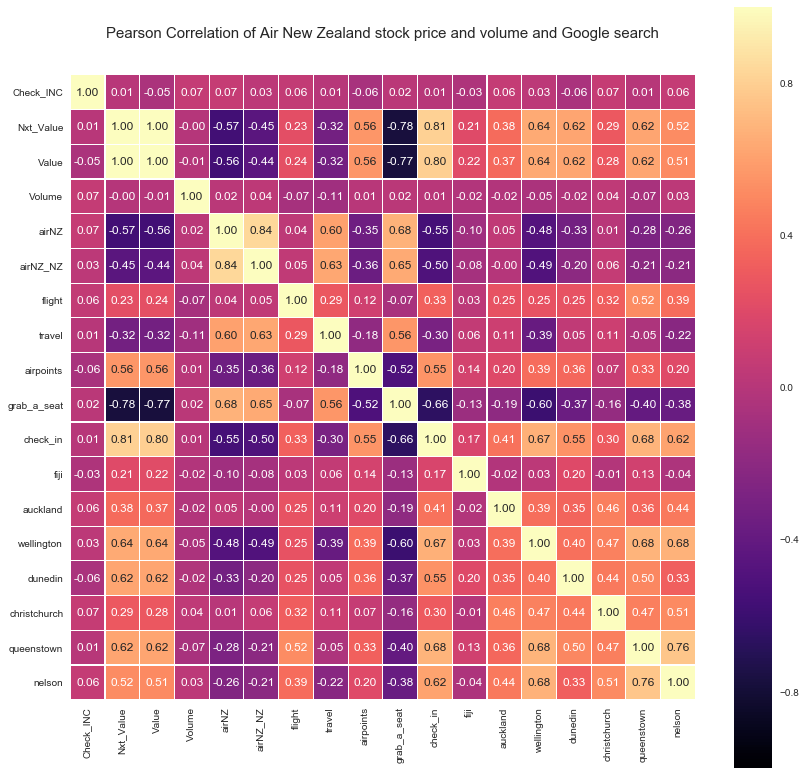

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Air New Zealand stock price and volume and Google search', y=1.05, size=15)
sns.heatmap(air.astype(float).corr(),linewidths=0.1,vmax=1.0,  fmt='.2f', square=True, cmap='magma', linecolor='white', annot=True)

In [18]:
# This table is to analyse based on the change rate of Google Trend Indexes
"""
airNZ_rate.corr().head()
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Air New Zealand stock price and volume and Google search', y=1.05, size=15)
sns.heatmap(airNZ_rate.astype(float).corr(),linewidths=0.1,vmax=1.0,  fmt='.2f', square=True, cmap='magma', linecolor='white', annot=True)
"""

"\nairNZ_rate.corr().head()\ncolormap = plt.cm.viridis\nplt.figure(figsize=(14,14))\nplt.title('Pearson Correlation of Air New Zealand stock price and volume and Google search', y=1.05, size=15)\nsns.heatmap(airNZ_rate.astype(float).corr(),linewidths=0.1,vmax=1.0,  fmt='.2f', square=True, cmap='magma', linecolor='white', annot=True)\n"

The change rate of Google Trend Index seems not to have any relationship with stock price. So, the research only focuses on just Google Trend Index.

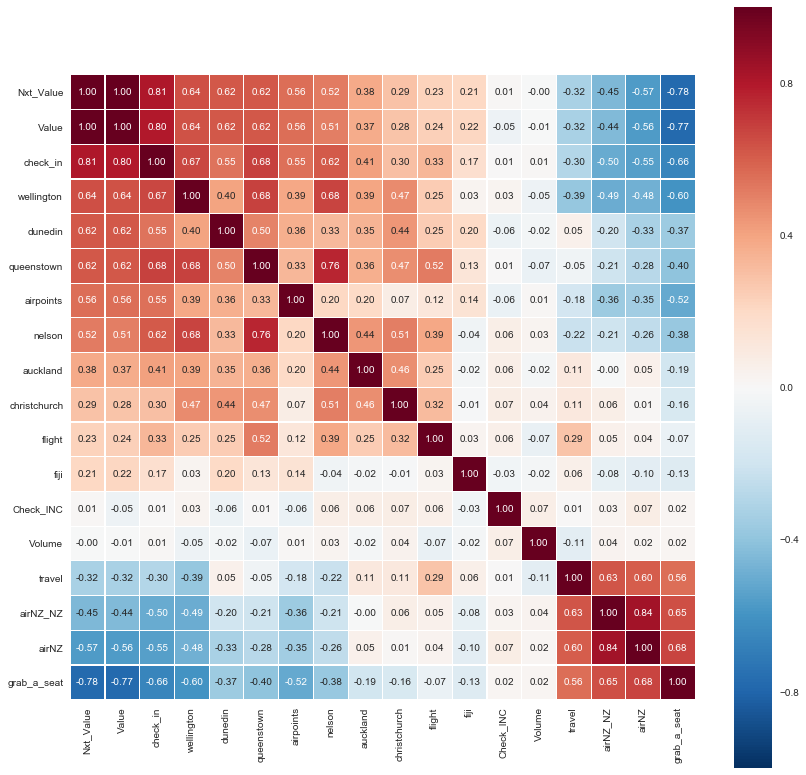

In [19]:
corrmat = air.corr()
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Nxt_Value')['Nxt_Value'].index
cm = np.corrcoef(air[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(14,14))
hm = sns.heatmap(cm, cbar=True, linewidths=0.1,vmax=1.0,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We will use only variations which are correlation > |0.5|

In [20]:
# COLUMNS: variations are correlation > |0.5|
COLUMNS = ['Nxt_Value', 'Value', 'check_in', 'wellington', 'queenstown', 'dunedin','airpoints', 'nelson', 'airNZ', 'grab_a_seat']

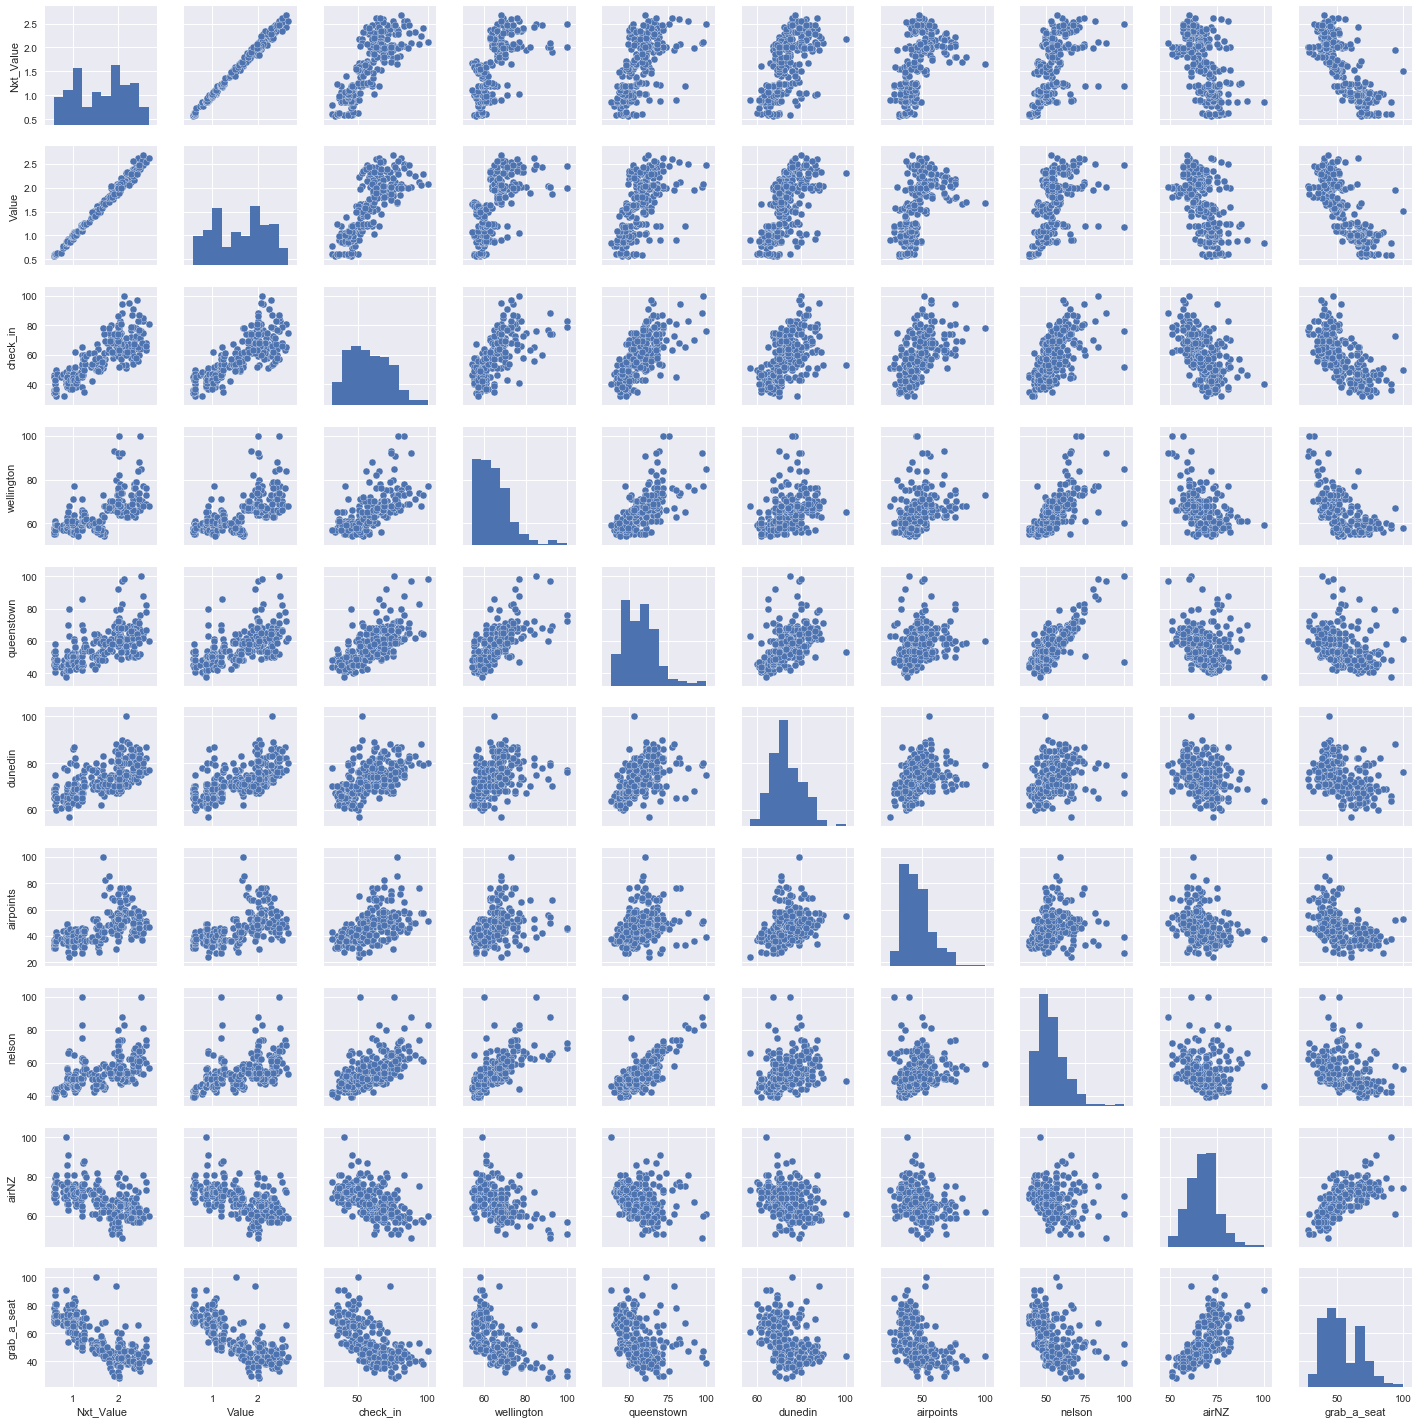

In [21]:
sns.set()
sns.pairplot(air[COLUMNS], size = 2)
plt.show();

### 3.2 Linear Analysis

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### Remove Outliers

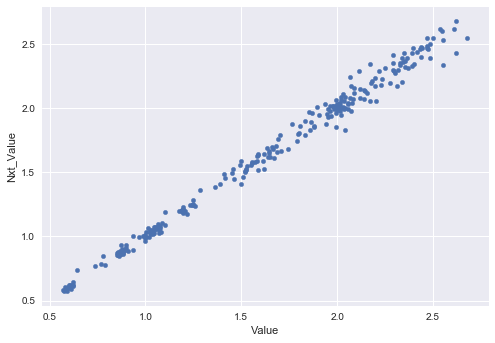

In [23]:
var = 'Value'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

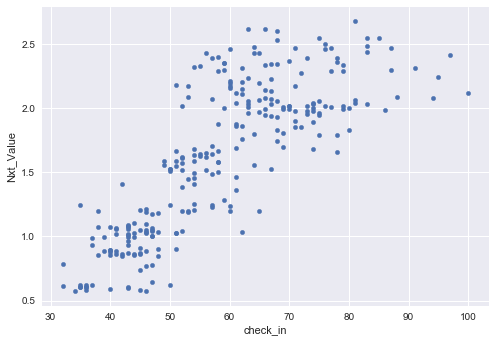

In [24]:
var = 'check_in'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [25]:
air.sort_values(by = var, ascending = False)[:3]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2017-01-01,1,2.1186,2.0886,1237733.0,60.0,60.0,63.0,80.0,51.0,47.0,100.0,53.0,83.0,77.0,80.0,74.0,98.0,83.0
2017-03-19,1,2.4140,2.2930,1093260.0,57.0,60.0,54.0,76.0,57.0,38.0,97.0,45.0,85.0,73.0,79.0,69.0,64.0,61.0
2017-02-19,1,2.2470,2.0670,1875820.0,58.0,57.0,55.0,81.0,57.0,40.0,95.0,41.0,82.0,68.0,88.0,77.0,65.0,62.0


In [26]:
air = air.drop(air[air[var] == 100.0].index)

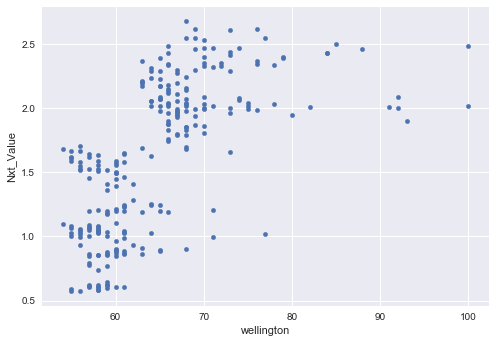

In [27]:
var = 'wellington'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [28]:
air.sort_values(by = var, ascending = False)[:18]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2016-12-18,1,2.0180,2.0012,1002860.0,51.0,48.0,57.0,64.0,46.0,29.0,79.0,43.0,76.0,100.0,76.0,74.0,72.0,72.0
2015-12-20,1,2.4836,2.4658,1222600.0,57.0,59.0,57.0,66.0,45.0,33.0,83.0,37.0,76.0,100.0,77.0,80.0,76.0,69.0
2016-11-13,1,1.8970,1.8614,1767740.0,61.0,48.0,48.0,70.0,67.0,29.0,74.0,36.0,87.0,93.0,70.0,84.0,69.0,66.0
2016-12-25,1,2.0886,2.0180,515600.0,49.0,54.0,63.0,70.0,50.0,43.0,88.0,41.0,76.0,92.0,79.0,71.0,97.0,88.0
2016-12-11,0,2.0012,2.0074,1968540.0,51.0,53.0,55.0,72.0,54.0,32.0,74.0,46.0,76.0,92.0,80.0,73.0,67.0,65.0
2016-12-04,0,2.0074,2.0320,1933840.0,53.0,50.0,49.0,66.0,56.0,28.0,77.0,37.0,78.0,91.0,73.0,69.0,60.0,62.0
2015-12-13,1,2.4658,2.4320,1156280.0,59.0,63.0,51.0,70.0,42.0,36.0,60.0,37.0,78.0,88.0,78.0,80.0,68.0,64.0
2015-12-27,1,2.4998,2.4836,752366.0,61.0,68.0,66.0,77.0,39.0,39.0,76.0,46.0,84.0,85.0,75.0,73.0,100.0,100.0
2015-12-06,1,2.4320,2.3906,1930020.0,59.0,59.0,49.0,73.0,46.0,35.0,56.0,36.0,82.0,84.0,79.0,76.0,64.0,62.0


In [29]:
# there are two points when wellington = 77.0 
# so remove the point using Volume
# make sure 276640.0 Volume is only one value.
air.Volume.value_counts()[276640.0]

1

In [30]:
air = air.drop(air[air[var] == 100.0].index)
air = air.drop(air[air[var] == 93.0].index)
air = air.drop(air[air[var] == 92.0].index)
air = air.drop(air[air[var] == 91.0].index)
air = air.drop(air[air['Volume'] == 276640.0].index)

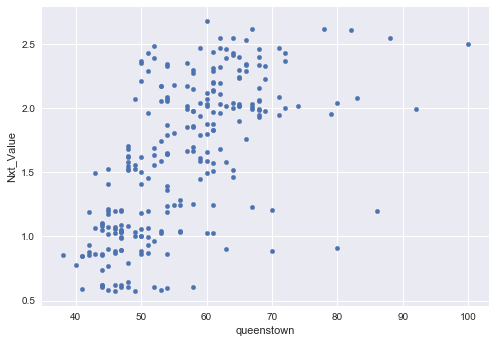

In [31]:
var = 'queenstown'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [32]:
air.sort_values(by = var, ascending = False)[:8]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2015-12-27,1,2.4998,2.4836,752366.0,61.0,68.0,66.0,77.0,39.0,39.0,76.0,46.0,84.0,85.0,75.0,73.0,100.0,100.0
2014-12-28,1,1.9922,1.9494,559900.0,67.0,70.0,81.0,73.0,36.0,54.0,70.0,39.0,76.0,75.0,68.0,70.0,92.0,80.0
2016-01-03,1,2.5456,2.4998,833250.0,81.0,87.0,66.0,98.0,57.0,47.0,83.0,46.0,86.0,77.0,78.0,77.0,88.0,81.0
2013-12-29,0,1.1978,1.2044,682400.0,75.0,78.0,56.0,74.0,33.0,67.0,65.0,34.0,80.0,65.0,65.0,69.0,86.0,83.0
2017-01-08,0,2.0790,2.1186,1300380.0,75.0,76.0,72.0,97.0,76.0,53.0,94.0,50.0,85.0,74.0,80.0,78.0,83.0,74.0
2016-01-10,1,2.6070,2.5456,1396680.0,77.0,81.0,71.0,96.0,51.0,56.0,68.0,45.0,89.0,73.0,82.0,81.0,82.0,71.0
2012-12-30,1,0.9068,0.9004,134700.0,76.0,79.0,56.0,82.0,33.0,78.0,45.0,35.0,75.0,63.0,65.0,65.0,80.0,67.0
2017-01-15,0,2.0404,2.0790,1135800.0,65.0,65.0,68.0,89.0,76.0,52.0,81.0,49.0,87.0,75.0,80.0,78.0,80.0,74.0


In [33]:
# there are two points when queenstown = 80.0 
# so remove the point using Volume
# make sure 134700.0 Volume is only one value.
air.Volume.value_counts()[134700.0]

1

In [34]:
air = air.drop(air[air[var] == 100.0].index)
air = air.drop(air[air[var] == 93.0].index)
air = air.drop(air[air[var] == 92.0].index)
air = air.drop(air[air[var] == 86.0].index)
air = air.drop(air[air['Volume'] == 134700.0].index)

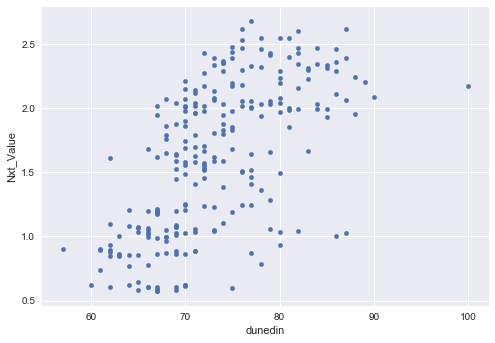

In [35]:
var = 'dunedin'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [36]:
air.sort_values(by = var, ascending = False)[:1]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2015-05-31,0,2.1704,2.3138,1359450.0,61.0,65.0,48.0,78.0,55.0,44.0,53.0,52.0,74.0,65.0,100.0,64.0,53.0,49.0


In [37]:
air = air.drop(air[air[var] == 100.0].index)

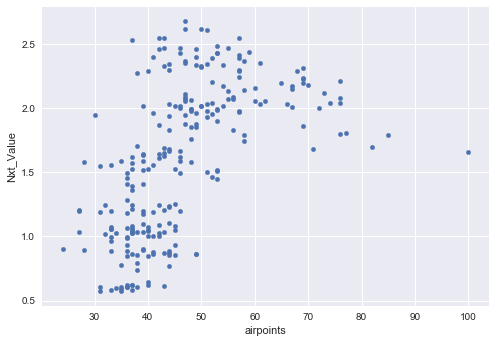

In [38]:
var = 'airpoints'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [39]:
air.sort_values(by = var, ascending = False)[:3]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2016-10-02,0,1.6606,1.6860,1895680.0,62.0,64.0,52.0,70.0,100.0,44.0,78.0,52.0,81.0,73.0,79.0,68.0,60.0,59.0
2016-10-16,1,1.7954,1.6992,1299820.0,62.0,60.0,50.0,74.0,85.0,41.0,78.0,42.0,78.0,68.0,71.0,65.0,59.0,56.0
2016-10-09,1,1.6992,1.6606,1141900.0,69.0,63.0,53.0,72.0,82.0,44.0,69.0,48.0,80.0,68.0,71.0,65.0,58.0,58.0


In [40]:
air = air.drop(air[air[var] == 100.0].index)
air = air.drop(air[air[var] == 85.0].index)
air = air.drop(air[air[var] == 82.0].index)

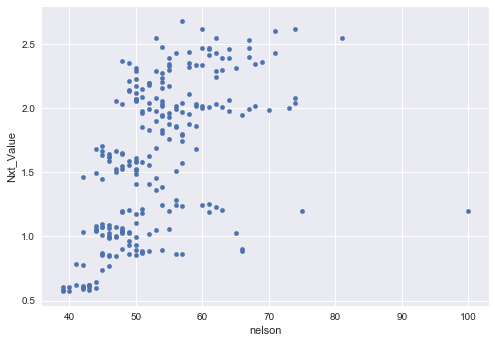

In [41]:
var = 'nelson'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

In [42]:
air.sort_values(by = var, ascending = False)[:3]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2013-12-01,1,1.1972,1.1862,5620760.0,70.0,70.0,42.0,74.0,27.0,52.0,52.0,35.0,77.0,60.0,67.0,70.0,47.0,100.0
2016-01-03,1,2.5456,2.4998,833250.0,81.0,87.0,66.0,98.0,57.0,47.0,83.0,46.0,86.0,77.0,78.0,77.0,88.0,81.0
2013-12-08,0,1.1950,1.1972,4098420.0,63.0,67.0,44.0,68.0,33.0,54.0,60.0,32.0,77.0,61.0,69.0,69.0,51.0,75.0


In [43]:
air = air.drop(air[air[var] == 100.0].index)
air = air.drop(air[air[var] == 75.0].index)

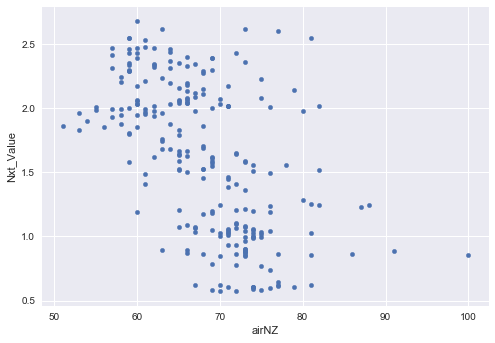

In [44]:
var = 'airNZ'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

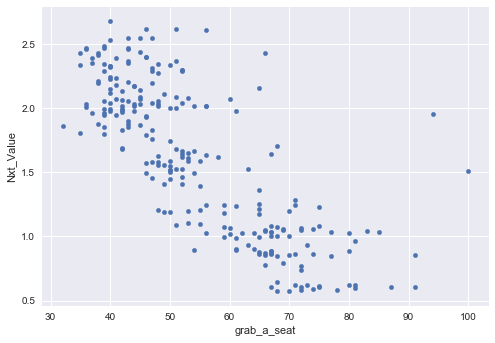

In [45]:
var = 'grab_a_seat'
data = pd.concat([air['Nxt_Value'], air[var]], axis=1)
data.plot.scatter(x=var, y='Nxt_Value')

The points which grab a seat > 90 are obviously outliers. So get rid of them.

In [46]:
air.sort_values(by = var, ascending = False)[:3]

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2014-07-13,0,1.5080,1.5202,1517360.0,74.0,80.0,71.0,90.0,53.0,100.0,50.0,45.0,75.0,58.0,76.0,69.0,61.0,56.0
2016-07-10,1,1.9532,1.9488,1522360.0,61.0,63.0,56.0,79.0,52.0,94.0,73.0,50.0,80.0,67.0,88.0,71.0,79.0,58.0
2012-10-28,1,0.8544,0.8506,237380.0,100.0,78.0,44.0,83.0,38.0,91.0,40.0,40.0,82.0,59.0,64.0,63.0,38.0,46.0


In [47]:
air = air.drop(air[air[var] == 100.0].index)
air = air.drop(air[air[var] == 94.0].index)

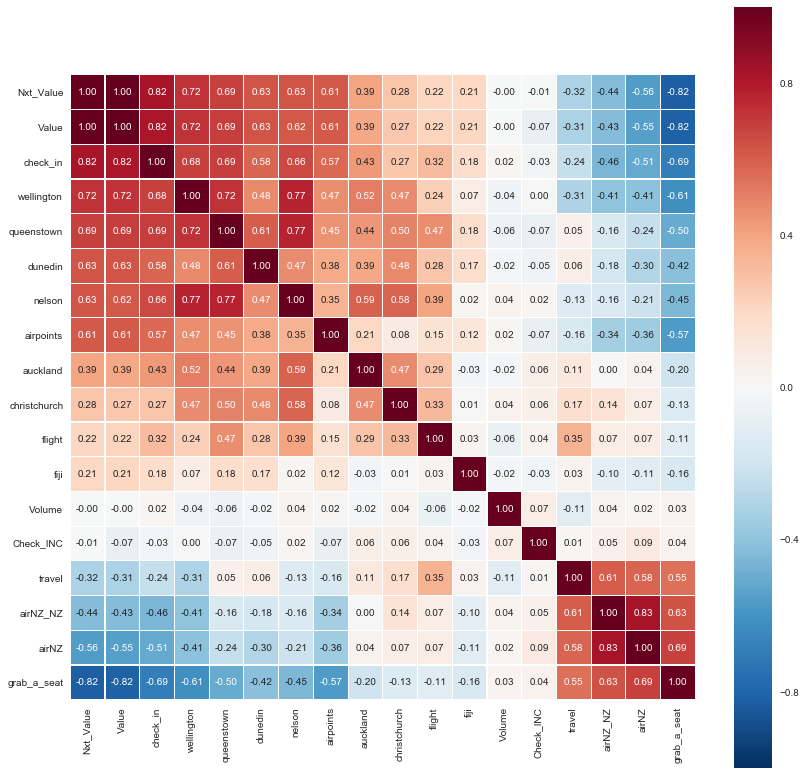

In [48]:
corrmat = air.corr()
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Nxt_Value')['Nxt_Value'].index
cm = np.corrcoef(air[cols].values.T)
sns.set(font_scale=1)
plt.figure(figsize=(14,14))
hm = sns.heatmap(cm, cbar=True, linewidths=0.1,vmax=1.0,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

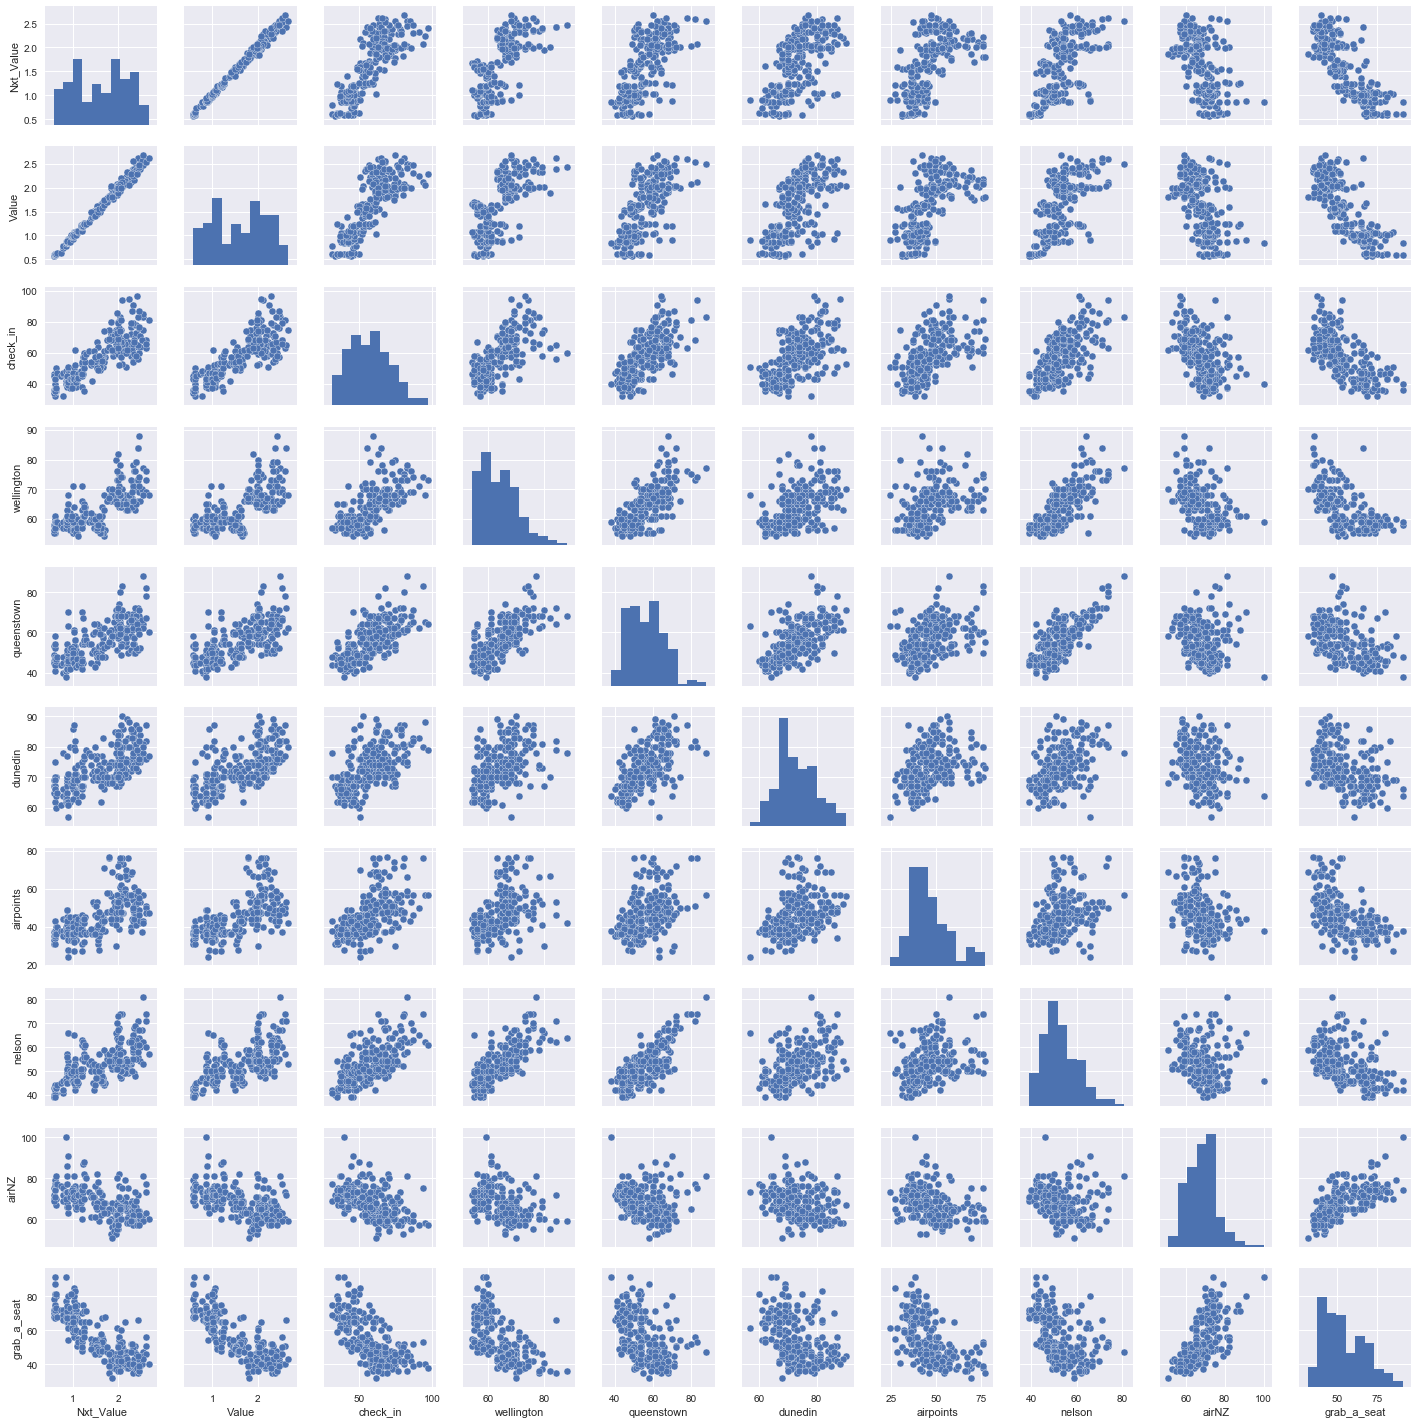

In [49]:
sns.set()
sns.pairplot(air[COLUMNS], size = 2)
plt.show();

After remove outliers, some correlation values have been increased.

### Bivariate Analysis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Nxt_Value   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.762e+04
Date:                Tue, 01 Aug 2017   Prob (F-statistic):          2.56e-247
Time:                        12:47:58   Log-Likelihood:                 355.01
No. Observations:                 239   AIC:                            -706.0
Df Residuals:                     237   BIC:                            -699.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0170      0.010      1.666      0.097        -0.003     0.037
Value          0.9939      0.006    166.178      0.000         0.982     1.006
==============================================================================
Omnibus:                       26.178   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.909
Skew:                          -0.391   Prob(JB):                     2.70e-18
Kurtosis:                       5.741   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

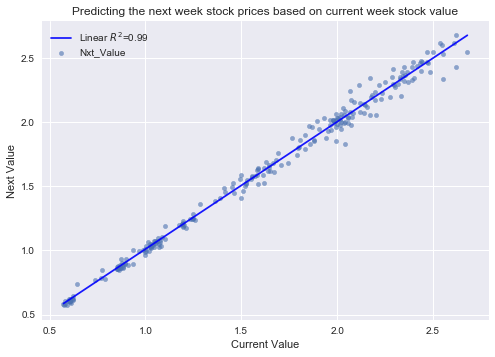

In [50]:
#generate the x-axis values that are in range for the 'Value' values
x = pd.DataFrame({'Value': np.linspace(air.Value.min(), air.Value.max(), len(air.Value))})

#generate the model which uses the stock price to predict the next stock price - the ols() return the generated model
mod = smf.ols(formula='Nxt_Value ~ 1 + Value', data=air).fit()

#plot the actual data
plt.scatter(air.Value, air.Nxt_Value, s=20, alpha=0.6)
plt.xlabel('Current Value'); plt.ylabel('Next Value')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.Value, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting the next week stock prices based on current week stock value")

#display the model statistics describing the goodness of fit
mod.summary()

In [51]:
def gapPredicNReal(NxtV, Val):
    temp = []
    pred = []
    for nxt, crr in zip(NxtV, Val):
        est = crr*mod.params[1] +mod.params[0]
        gap = est - nxt
        pred.append(est)
        temp.append(gap)
    return temp, pred

In [52]:
gapSngl, predicBi = gapPredicNReal(air['Nxt_Value'], air['Value'])

In [53]:
x = air.index
y = gapSngl
x = pd.to_datetime(x)

trace1 = go.Scatter(
    x = x,
    y = y,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace1]

layout = dict(title = 'Difference between forecasted and actual stock price',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


In [54]:
snglErrors = []
print metrics.mean_absolute_error(air['Nxt_Value'], predicBi)
snglErrors.append(metrics.mean_absolute_error(air['Nxt_Value'], predicBi))
print metrics.mean_squared_error(air['Nxt_Value'], predicBi)
snglErrors.append(metrics.mean_squared_error(air['Nxt_Value'], predicBi))
print np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicBi))
snglErrors.append(np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicBi)))

0.0386699909804
0.00300141698929
0.0547851895068


### Multivariate Analysis with current stock price

In [55]:
multi_linear = smf.ols(formula='Nxt_Value ~ 1 + Value + check_in + wellington + queenstown + dunedin + airpoints + nelson + airNZ + grab_a_seat', data=air[COLUMNS]).fit()
print multi_linear.params[0:10]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept      0.000652
Value          0.953063
check_in       0.001006
wellington     0.000501
queenstown    -0.000885
dunedin        0.000765
airpoints     -0.000246
nelson         0.000543
airNZ          0.000603
grab_a_seat   -0.001345
dtype: float64
R-Squared:  0.991976441394


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Nxt_Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     3146.
Date:                Tue, 01 Aug 2017   Prob (F-statistic):          1.61e-234
Time:                        12:47:59   Log-Likelihood:                 362.03
No. Observations:                 239   AIC:                            -704.1
Df Residuals:                     229   BIC:                            -669.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0007      0.079      0.008      0.993        -0.155     0.157
Value           0.9531      0.015     64.296      0.000         0.924     0.982
check_in        0.0010      0.000      2.023      0.044       2.6e-05     0.002
wellington      0.0005      0.001      0.499      0.618        -0.001     0.002
queenstown     -0.0009      0.001     -1.227      0.221        -0.002     0.001
dunedin         0.0008      0.001      1.040      0.299        -0.001     0.002
airpoints      -0.0002      0.000     -0.577      0.565        -0.001     0.001
nelson          0.0005      0.001      0.628      0.530        -0.001     0.002
airNZ           0.0006      0.001      0.857      0.393        -0.001     0.002
grab_a_seat    -0.0013      0.001     -2.443      0.015        -0.002    -0.000
==============================================================================
Omnibus:                       26.263   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.069
Skew:                          -0.481   Prob(JB):                     7.42e-15
Kurtosis:                       5.368   Cond. No.                     3.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
def gapPredMultiVal(df): 
    temp = []
    pred = []
    for row in range(0,len(df)):
        estimate = 0.0
        for col in df.columns[1:]:
            estimate = estimate + (multi_linear.params[col])*df.ix[row,col]
        estimate = estimate +(multi_linear.params['Intercept'])
        gap = estimate - df.ix[row,'Nxt_Value']
        pred.append(estimate)
        temp.append(gap)
    return temp, pred

In [57]:
gapMulti, predicMlt = gapPredMultiVal(air[COLUMNS])

In [58]:
x = np.array(air.index)
y = gapMulti
x = pd.to_datetime(x)

trace1 = go.Scatter(
    x = x,
    y = y,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace1]

layout = dict(title = 'Difference between forecasted and actual stock price',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [59]:
multiErrors = []
print metrics.mean_absolute_error(air['Nxt_Value'], predicMlt)
multiErrors.append(metrics.mean_absolute_error(air['Nxt_Value'], predicMlt))
print metrics.mean_squared_error(air['Nxt_Value'], predicMlt)
multiErrors.append(metrics.mean_squared_error(air['Nxt_Value'], predicMlt))
print np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicMlt))
multiErrors.append(np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicMlt)))

0.038323945841
0.0028301187266
0.0531988602002


### Multivariate Analysis only using Google Trend Indexes

In [60]:
multi_linear = smf.ols(formula='Nxt_Value ~ 1 + check_in + wellington + queenstown + dunedin + airpoints + nelson + airNZ + grab_a_seat', data=air[COLUMNS]).fit()
print multi_linear.params[0:10]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept     -0.306325
check_in       0.010970
wellington     0.009352
queenstown     0.003751
dunedin        0.015697
airpoints      0.003889
nelson         0.002615
airNZ          0.001223
grab_a_seat   -0.019670
dtype: float64
R-Squared:  0.847130947604


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Nxt_Value   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           2.56e-89
Time:                        12:48:00   Log-Likelihood:                 9.8420
No. Observations:                 239   AIC:                            -1.684
Df Residuals:                     230   BIC:                             29.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3063      0.344     -0.889      0.375        -0.985     0.372
check_in        0.0110      0.002      5.326      0.000         0.007     0.015
wellington      0.0094      0.004      2.159      0.032         0.001     0.018
queenstown      0.0038      0.003      1.200      0.231        -0.002     0.010
dunedin         0.0157      0.003      5.163      0.000         0.010     0.022
airpoints       0.0039      0.002      2.117      0.035         0.000     0.008
nelson          0.0026      0.004      0.696      0.487        -0.005     0.010
airNZ           0.0012      0.003      0.399      0.690        -0.005     0.007
grab_a_seat    -0.0197      0.002     -9.587      0.000        -0.024    -0.016
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.708
Skew:                           0.113   Prob(JB):                        0.702
Kurtosis:                       2.858   Cond. No.                     3.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
tempCols = ['Nxt_Value','check_in','wellington','queenstown','dunedin','airpoints','nelson','airNZ','grab_a_seat']

In [62]:
gapOnlyGTrend, predicOnlyGg = gapPredMultiVal(air[tempCols])

In [63]:
x = np.array(air.index)
y = gapOnlyGTrend
x = pd.to_datetime(x)

trace1 = go.Scatter(
    x = x,
    y = y,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace1]

layout = dict(title = 'Difference between forecasted and actual stock price',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [64]:
multiGgErrors = []
print metrics.mean_absolute_error(air['Nxt_Value'], predicOnlyGg)
multiGgErrors.append(metrics.mean_absolute_error(air['Nxt_Value'], predicOnlyGg))
print metrics.mean_squared_error(air['Nxt_Value'], predicOnlyGg)
multiGgErrors.append(metrics.mean_squared_error(air['Nxt_Value'], predicOnlyGg))
print np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicOnlyGg))
multiGgErrors.append(np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predicOnlyGg)))

0.185460209381
0.0539209083087
0.232208760189


### Multivariate Analysis using sklearn library

In [65]:
X = air[COLUMNS[1:]]
y = air['Nxt_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

0.051874315987
[  9.58774543e-01   9.28825331e-04   5.23765914e-04  -4.64813487e-04
   9.95878353e-04  -8.10885348e-04  -4.31992955e-05   2.67344093e-04
  -1.54168843e-03]


In [67]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)

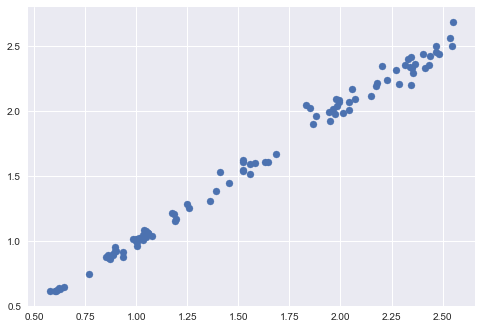

In [68]:
plt.scatter(y_test, predictions)

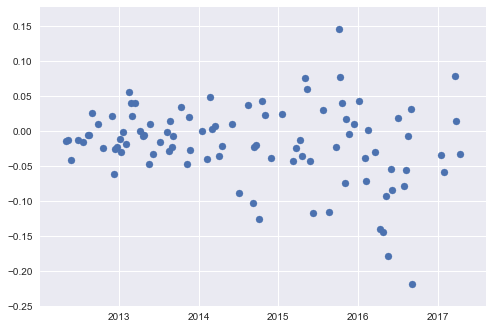

In [69]:
d = pd.to_datetime(y_test.index)
plt.scatter(d, (y_test-predictions))

In [70]:
# plotly version
# personally prefer plotly because its graphs are interactive and easy to customize
"""
d = pd.to_datetime(y_test.index)
trace1 = go.Scatter(
    x = d,
    y = (y_test-predictions),
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace1]

layout = dict(title = 'Difference between forecasted and actual stock price',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
"""

"\nd = pd.to_datetime(y_test.index)\ntrace1 = go.Scatter(\n    x = d,\n    y = (y_test-predictions),\n    name = 'Below',\n    mode = 'markers',\n    marker = dict(\n        size = 10,\n        color = 'rgba(255, 182, 193, .9)',\n        line = dict(\n            width = 2,\n        )\n    )\n)\n\ndata = [trace1]\n\nlayout = dict(title = 'Difference between forecasted and actual stock price',\n              yaxis = dict(zeroline = True),\n              xaxis = dict(zeroline = False)\n             )\n\nfig = dict(data=data, layout=layout)\npy.iplot(fig, filename='styled-scatter')\n"

Skewness: -0.717485


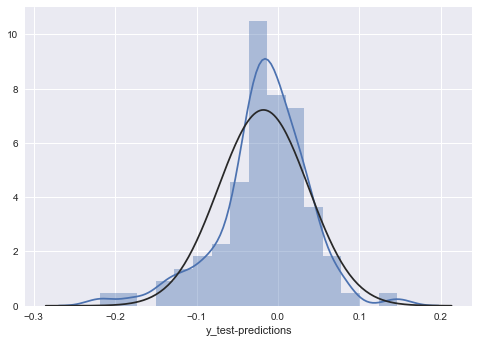

In [71]:
print("Skewness: %f" % (y_test-predictions).skew())
sns.distplot((y_test-predictions), fit=norm)
plt.xlabel('y_test-predictions')

In [72]:
sklearnErrors = []
print metrics.mean_absolute_error(y_test, predictions)
sklearnErrors.append(metrics.mean_absolute_error(y_test, predictions))
print metrics.mean_squared_error(y_test, predictions)
sklearnErrors.append(metrics.mean_squared_error(y_test, predictions))
print np.sqrt(metrics.mean_squared_error(y_test, predictions))
sklearnErrors.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.041498962823
0.00336917882502
0.0580446278739


### Normalization using logarithm

Skewness: -0.115752
Kurtosis: -1.271073


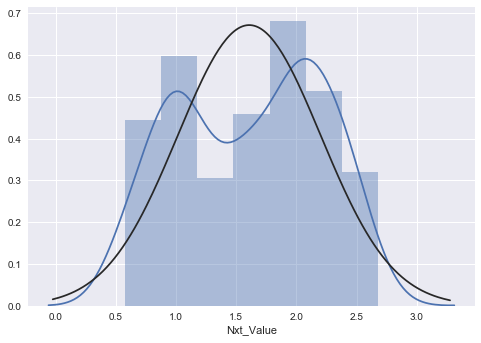

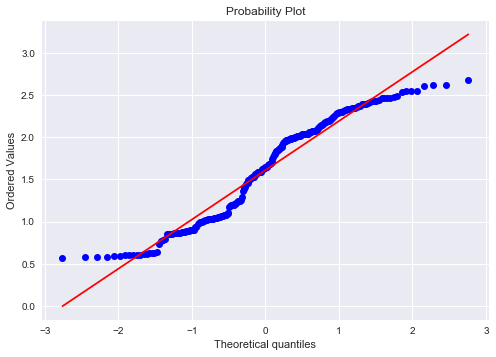

In [73]:
#histogram and normal probability plot
#skewness and kurtosis
print("Skewness: %f" % air['Nxt_Value'].skew())
print("Kurtosis: %f" % air['Nxt_Value'].kurt())
sns.distplot(air['Nxt_Value'], fit=norm);
fig = plt.figure()
res = stats.probplot(air['Nxt_Value'], plot=plt)

In [74]:
#applying log transformation
air_log = pd.DataFrame()
for col in air.columns[1:]:
    air_log.loc[:,col] = np.log(air.loc[:,col])

Skewness: -0.610276
Kurtosis: -0.740831


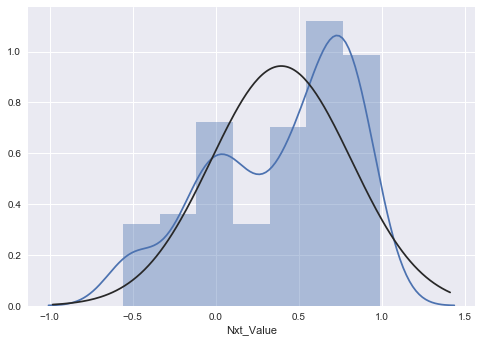

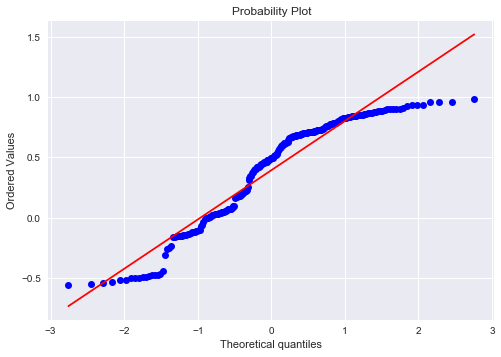

In [75]:
print("Skewness: %f" % air_log['Nxt_Value'].skew())
print("Kurtosis: %f" % air_log['Nxt_Value'].kurt())
sns.distplot(air_log['Nxt_Value'], fit=norm);
fig = plt.figure()
res = stats.probplot(air_log['Nxt_Value'], plot=plt)

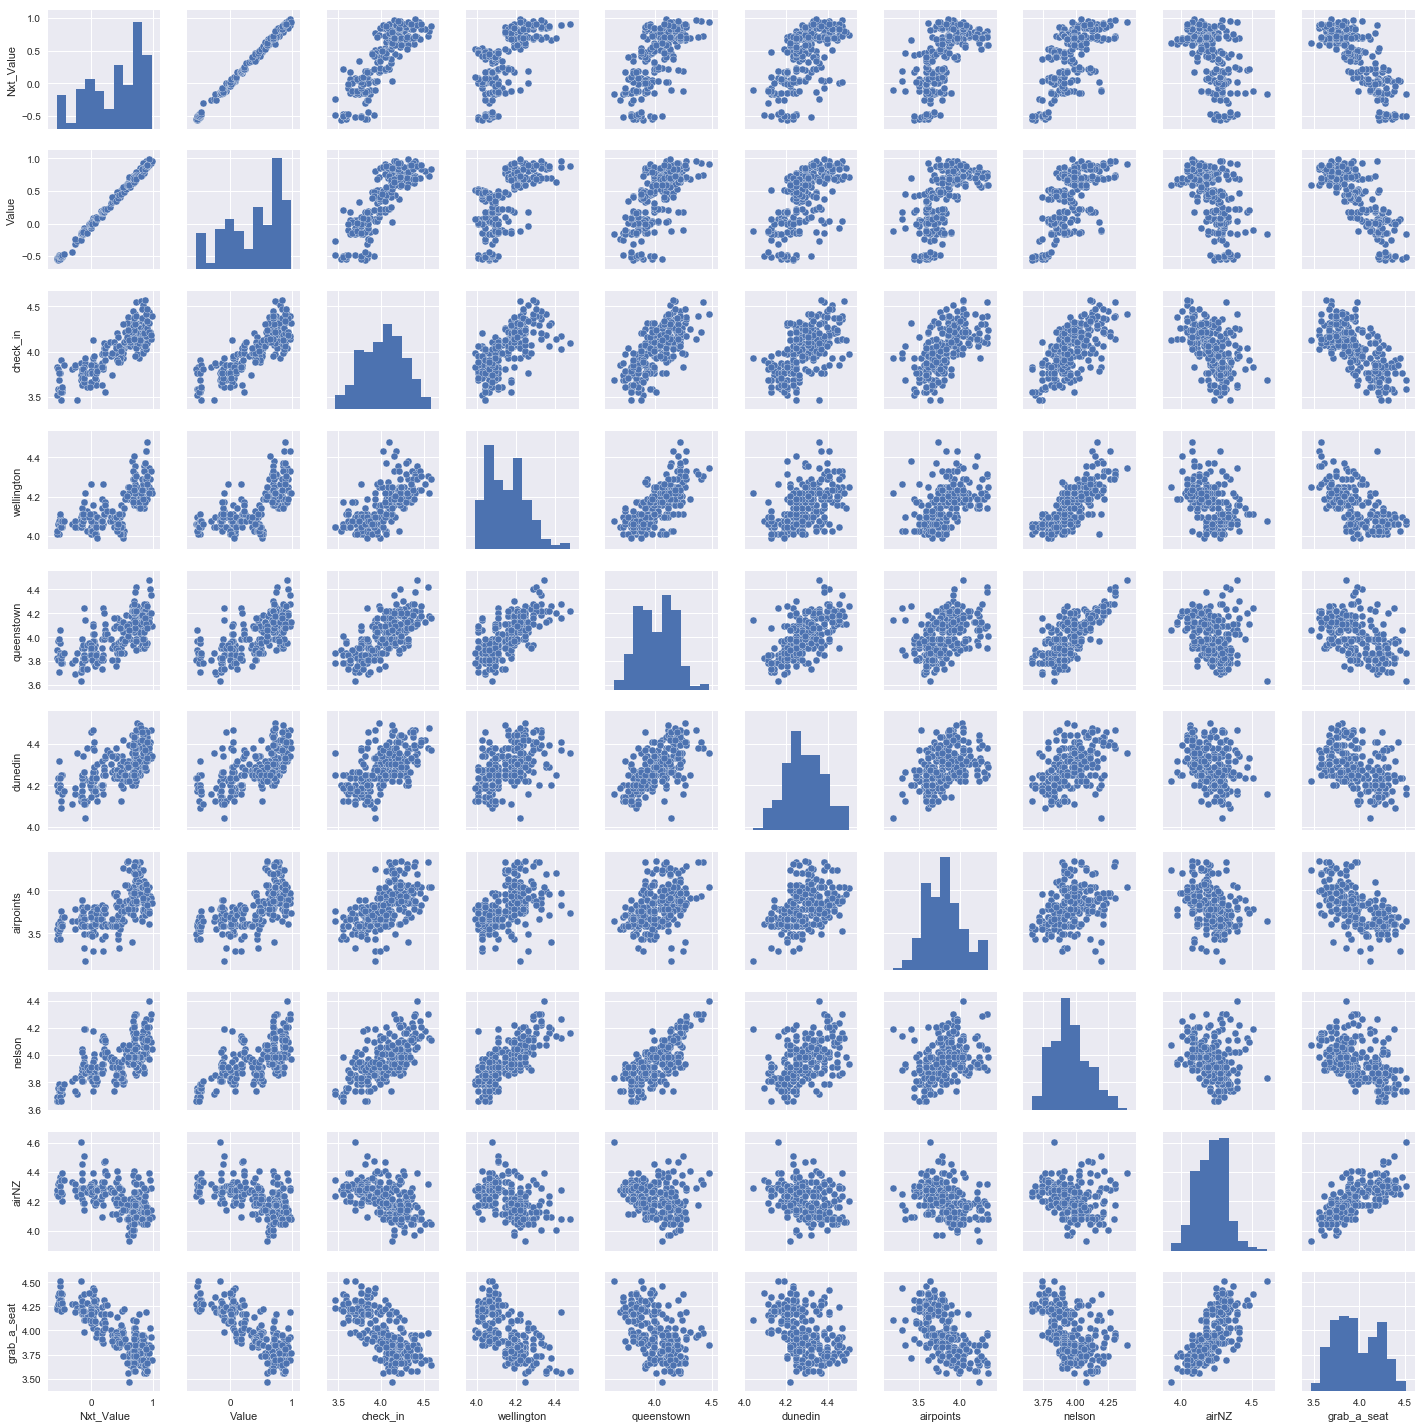

In [76]:
sns.set()
sns.pairplot(air_log[COLUMNS], size = 2)
plt.show();

Most of the data has changed to more normal. But, the absolute skewness value of the next stock prices as a predictor has been increased. So, this research did not use logarithm.

In [77]:
print 'Original correlation:',(air[air.columns[:]].corr()['Volume']['Nxt_Value'])
print 'After transformed:',(air_log[air_log.columns[:]].corr()['Volume']['Nxt_Value'])

Original correlation: -0.000116629340474
After transformed: 0.487494271303


After transformed, the research found that the correlationship between 'Volume' and 'Nxt_Value' has significantly increased from -0.000116629340474 to 0.487494271303. But it is still less than 0.5 so we do not use 'Volume'.

In [78]:
X = air_log[COLUMNS[1:]]
y = air_log['Nxt_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [79]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

0.00108638673041
[ 0.96680507  0.02963283  0.00960126 -0.02933066  0.02013669 -0.01490751
  0.01465381  0.01504553 -0.04309706]


In [80]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)

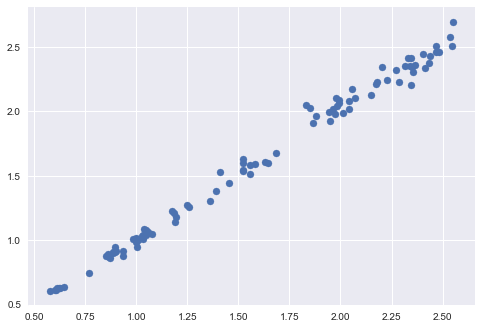

In [81]:
plt.scatter(np.exp(y_test), np.exp(predictions))

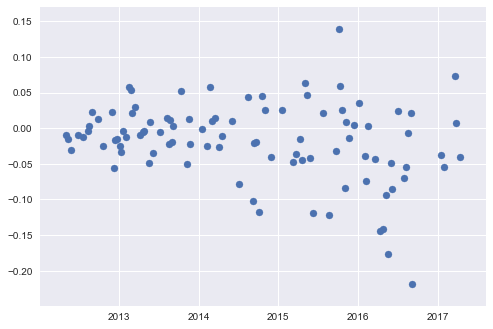

In [82]:
d = pd.to_datetime(y_test.index)
plt.scatter(d, (np.exp(y_test)-np.exp(predictions)))

In [83]:
"""
d = pd.to_datetime(y_test.index)
trace1 = go.Scatter(
    x = d,
    y = (np.exp(y_test)-np.exp(predictions)),
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace1]

layout = dict(title = 'Difference between forecasted and actual stock price',
              yaxis = dict(zeroline = True),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
"""

"\nd = pd.to_datetime(y_test.index)\ntrace1 = go.Scatter(\n    x = d,\n    y = (np.exp(y_test)-np.exp(predictions)),\n    name = 'Below',\n    mode = 'markers',\n    marker = dict(\n        size = 10,\n        color = 'rgba(255, 182, 193, .9)',\n        line = dict(\n            width = 2,\n        )\n    )\n)\n\ndata = [trace1]\n\nlayout = dict(title = 'Difference between forecasted and actual stock price',\n              yaxis = dict(zeroline = True),\n              xaxis = dict(zeroline = False)\n             )\n\nfig = dict(data=data, layout=layout)\npy.iplot(fig, filename='styled-scatter')\n"

In [84]:
logErrors = []
print metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions))
logErrors.append(metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions)))
print metrics.mean_squared_error(np.exp(y_test), np.exp(predictions))
logErrors.append(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions)))
print np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions)))
logErrors.append(np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions))))

0.0406993827145
0.00327314094913
0.0572113708028


### Linear Regression Models Comparison

In [85]:
print 'Bivariate:                        ', snglErrors
print 'Multi-variate with stock:         ', multiErrors
print 'Multi-variate only Google Indexes:', multiGgErrors
print 'Multi-variate using sklearn lib:  ', sklearnErrors
print 'Multi-variate after log transform:', logErrors

Bivariate:                         [0.038669990980398652, 0.0030014169892905282, 0.054785189506750161]
Multi-variate with stock:          [0.038323945840986508, 0.002830118726603637, 0.053198860200230201]
Multi-variate only Google Indexes: [0.18546020938065458, 0.053920908308730066, 0.23220876018946845]
Multi-variate using sklearn lib:   [0.04149896282302188, 0.003369178825020646, 0.058044627873909627]
Multi-variate after log transform: [0.040699382714508563, 0.0032731409491297716, 0.057211370802750142]


Amongst 4 models, the model using sklearn library has the lowest error values. This model may be the best model.

### Normalization using minimum and maximum

In [86]:
minmax_scale = preprocessing.MinMaxScaler().fit(air[COLUMNS])
air_minmax = minmax_scale.transform(air[COLUMNS])
air_minmax = pd.DataFrame(air_minmax)

Skewness: -0.115752
Kurtosis: -1.271073


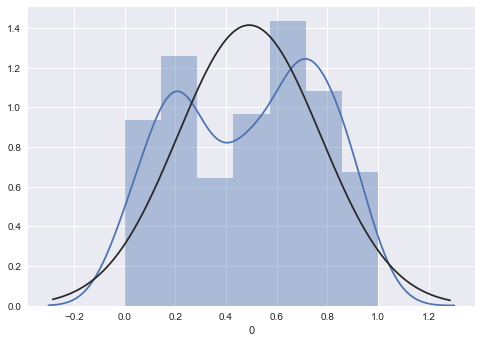

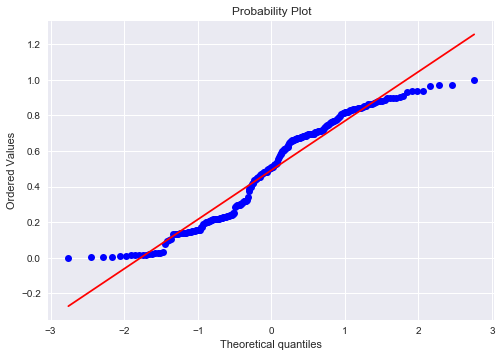

In [87]:
print("Skewness: %f" % air_minmax[0].skew())
print("Kurtosis: %f" % air_minmax[0].kurt())
sns.distplot(air_minmax[0], fit=norm);
fig = plt.figure()
res = stats.probplot(air_minmax[0], plot=plt)

Normalization using minimum and maximum seems not good since the skewness has not changed significantly.

### 3.3 Logistic Regression

This model predict whether the next week's average stock price will be increased or decreased.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [89]:
X = air[COLUMNS[1:]]
y = air['Check_INC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
predictions = logmodel.predict(X_test)

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.02      0.04        45
          1       0.54      1.00      0.70        51

avg / total       0.75      0.54      0.39        96



Not so bad. This model has a probability of 75%.

### 3.4 KNN

This section predicts that the next week average stock value will be increased or decreased using KNN model.

In [93]:
scaler = StandardScaler()
scaler.fit(air[COLUMNS[1:]])
scaled_features = scaler.transform(air[COLUMNS[1:]])

In [94]:
air_feat = pd.DataFrame(scaled_features, columns=COLUMNS[1:])

In [95]:
air_feat.head()

,Value,check_in,wellington,queenstown,dunedin,airpoints,nelson,airNZ,grab_a_seat
0,-1.676569,-1.629126,-0.894925,-1.294581,-0.452592,-0.550072,-1.544509,0.248518,1.950366
1,-1.645982,-1.556741,-1.048249,-1.294581,-0.452592,-0.827624,-1.283726,-0.163953,1.265094
2,-1.644637,-1.846283,-1.048249,-1.294581,-0.452592,-0.272520,-1.414118,1.210948,1.569660
3,-1.659763,-1.267199,-1.354897,-1.622688,-0.903298,-1.012659,-1.414118,0.798478,1.493518
4,-1.692367,-0.832887,-1.354897,-1.075843,-0.903298,-1.012659,-1.805291,0.248518,1.188953


In [96]:
X = air_feat
y = air['Check_INC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[15 24]
 [ 9 24]]
             precision    recall  f1-score   support

          0       0.62      0.38      0.48        39
          1       0.50      0.73      0.59        33

avg / total       0.57      0.54      0.53        72



In [98]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

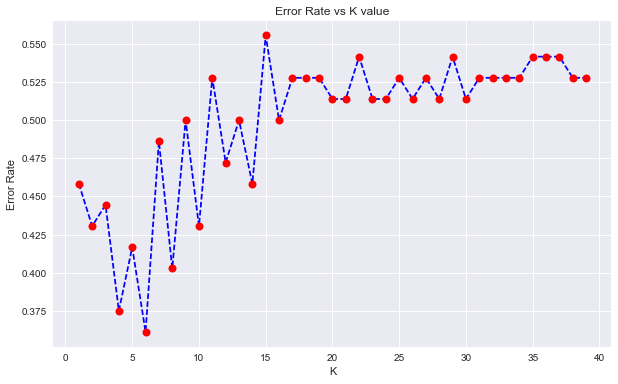

In [99]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize = 8)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [100]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[19 20]
 [ 6 27]]
             precision    recall  f1-score   support

          0       0.76      0.49      0.59        39
          1       0.57      0.82      0.68        33

avg / total       0.67      0.64      0.63        72



This KNN model seems worse than logistic regression model. It has a probabilty of 67%.

### 4. Conclusion

Although stock and google index have relatively high correlation, it is only a probabilty of 75% to predict that the stock would go up or down. But, as linear models showed, Google Trend Index may be used as an auxiliary measure to predict stock price.

This part is added.

In [101]:
air.head()

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2012-04-29,1,0.6210,0.6028,172420.0,70.0,73.0,48.0,93.0,40.0,80.0,35.0,40.0,75.0,58.0,70.0,66.0,44.0,41.0
2012-05-06,1,0.6218,0.6210,289300.0,67.0,71.0,45.0,90.0,37.0,71.0,36.0,44.0,75.0,57.0,70.0,65.0,44.0,43.0
2012-05-13,0,0.6128,0.6218,151080.0,77.0,69.0,49.0,94.0,43.0,75.0,32.0,45.0,74.0,57.0,70.0,65.0,44.0,42.0
2012-05-20,0,0.5934,0.6128,227920.0,74.0,73.0,49.0,89.0,35.0,74.0,40.0,41.0,72.0,55.0,67.0,69.0,41.0,42.0
2012-05-27,0,0.5774,0.5934,344400.0,70.0,70.0,48.0,93.0,35.0,70.0,46.0,46.0,71.0,55.0,67.0,64.0,46.0,39.0


In [102]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
X = air.drop('Check_INC', axis=1)
y = air['Check_INC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [104]:
print (confusion_matrix(y_test, predictions))
print '\n'
print (classification_report(y_test, predictions))

[[16 16]
 [22 25]]


             precision    recall  f1-score   support

          0       0.42      0.50      0.46        32
          1       0.61      0.53      0.57        47

avg / total       0.53      0.52      0.52        79



#### Boosting Model

In [105]:
air.head()

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2012-04-29,1,0.6210,0.6028,172420.0,70.0,73.0,48.0,93.0,40.0,80.0,35.0,40.0,75.0,58.0,70.0,66.0,44.0,41.0
2012-05-06,1,0.6218,0.6210,289300.0,67.0,71.0,45.0,90.0,37.0,71.0,36.0,44.0,75.0,57.0,70.0,65.0,44.0,43.0
2012-05-13,0,0.6128,0.6218,151080.0,77.0,69.0,49.0,94.0,43.0,75.0,32.0,45.0,74.0,57.0,70.0,65.0,44.0,42.0
2012-05-20,0,0.5934,0.6128,227920.0,74.0,73.0,49.0,89.0,35.0,74.0,40.0,41.0,72.0,55.0,67.0,69.0,41.0,42.0
2012-05-27,0,0.5774,0.5934,344400.0,70.0,70.0,48.0,93.0,35.0,70.0,46.0,46.0,71.0,55.0,67.0,64.0,46.0,39.0


In [106]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [107]:
X = air.drop(['Check_INC','Nxt_Value'], axis=1)
y = air['Nxt_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X, y)

In [109]:
def logToReal(array):
    temp = []
    for log_price in array:
        temp.append(np.exp(log_price))
    return temp

In [110]:
predictGB = GBest.fit(X, y).predict(X)
#predictGB_Val = logToReal(predictGB2)

In [111]:
print metrics.mean_absolute_error(air['Nxt_Value'], predictGB)
print metrics.mean_squared_error(air['Nxt_Value'], predictGB)
print np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predictGB))

0.00348982365374
0.000182613394619
0.0135134523575


In [112]:
trace0 = go.Bar(x=air.index,y=air['Nxt_Value'], name='actual')
trace1 = go.Bar(x=air.index, y=predictGB, name='predicted')
data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [113]:
Image(url= "https://raw.githubusercontent.com/peterjhwang/Forecasting-Air-New-Zealand-stock-prices/master/with_stockprice.jpg")

#### Prediction without current stock prices

In [114]:
air.head()

,Check_INC,Nxt_Value,Value,Volume,airNZ,airNZ_NZ,flight,travel,airpoints,grab_a_seat,check_in,fiji,auckland,wellington,dunedin,christchurch,queenstown,nelson
date,,,,,,,,,,,,,,,,,,
2012-04-29,1,0.6210,0.6028,172420.0,70.0,73.0,48.0,93.0,40.0,80.0,35.0,40.0,75.0,58.0,70.0,66.0,44.0,41.0
2012-05-06,1,0.6218,0.6210,289300.0,67.0,71.0,45.0,90.0,37.0,71.0,36.0,44.0,75.0,57.0,70.0,65.0,44.0,43.0
2012-05-13,0,0.6128,0.6218,151080.0,77.0,69.0,49.0,94.0,43.0,75.0,32.0,45.0,74.0,57.0,70.0,65.0,44.0,42.0
2012-05-20,0,0.5934,0.6128,227920.0,74.0,73.0,49.0,89.0,35.0,74.0,40.0,41.0,72.0,55.0,67.0,69.0,41.0,42.0
2012-05-27,0,0.5774,0.5934,344400.0,70.0,70.0,48.0,93.0,35.0,70.0,46.0,46.0,71.0,55.0,67.0,64.0,46.0,39.0


In [115]:
X = air.drop(['Check_INC','Nxt_Value','Value' ], axis=1)
y = air['Nxt_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X, y)

In [117]:
predictGB2 = GBest.fit(X, y).predict(X)

In [118]:
print metrics.mean_absolute_error(air['Nxt_Value'], predictGB2)
print metrics.mean_squared_error(air['Nxt_Value'], predictGB2)
print np.sqrt(metrics.mean_squared_error(air['Nxt_Value'], predictGB2))

0.00556248193642
0.000407991256552
0.020198793443


In [119]:
trace0 = go.Bar(x=air.index,y=air['Nxt_Value'], name='actual')
trace1 = go.Bar(x=air.index, y=predictGB2, name='predicted')
data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [120]:
Image(url= "https://raw.githubusercontent.com/peterjhwang/Forecasting-Air-New-Zealand-stock-prices/master/without_stockprice.jpg")